# Writing Sample

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [3]:
atl2 = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-20)_lat:(-70,70)_ds_rho_test.nc')

(27.8, 26.25)

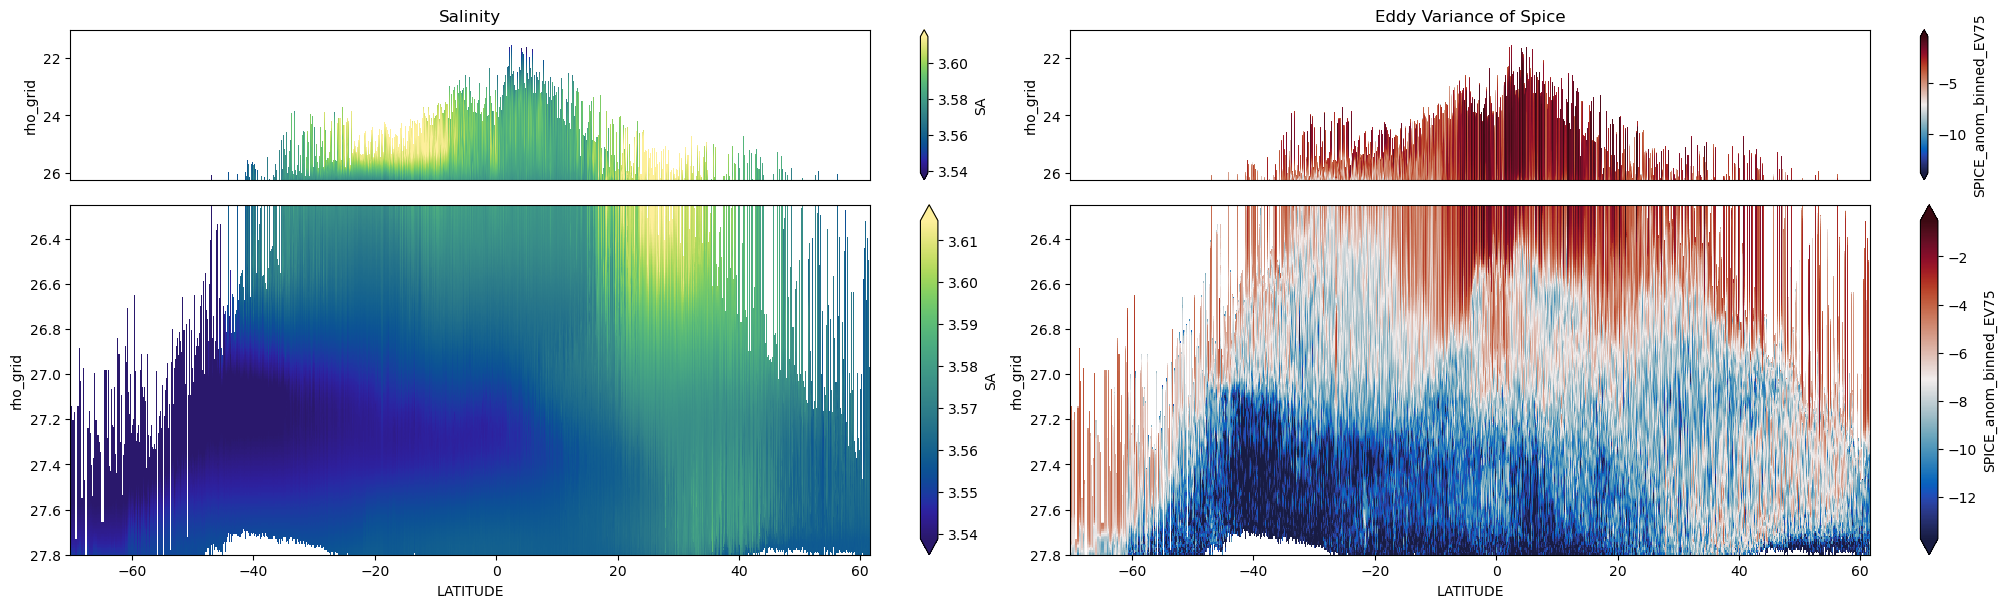

In [4]:
fig = plt.figure(figsize=(20,5))
x = 'LATITUDE'

top = 21
mid = 26.25
bot = 27.8

ax1 = fig.add_axes([0,0.75,0.5,0.3])
np.log(atl2.SA.sortby(x)).plot(x=x,y='rho_grid',ax=ax1,cmap=cmo.haline,robust=True)
plt.gca().invert_yaxis()
ax1.set_ylim(mid,top)
ax1.set_xticks([])
ax1.set_xlabel('')
plt.title('Salinity')

ax2 = fig.add_axes([0,0,0.5,0.7])
np.log(atl2.SA.sortby(x)).plot(x=x,y='rho_grid',ax=ax2,cmap=cmo.haline,robust=True)
plt.gca().invert_yaxis()
ax2.set_ylim(bot,mid)

ax3 = fig.add_axes([0.5,0.75,0.5,0.3])
np.log(atl2.SPICE_anom_binned_EV75.sortby(x)).plot(x=x,y='rho_grid',ax=ax3,cmap=cmo.balance,robust=True)
plt.gca().invert_yaxis()
ax3.set_ylim(mid,top)
ax3.set_xticks([])
ax3.set_xlabel('')
plt.title('Eddy Variance of Spice')

ax4 = fig.add_axes([0.5,0,0.5,0.7])
np.log(atl2.SPICE_anom_binned_EV75.sortby(x)).plot(x=x,y='rho_grid',ax=ax4,cmap=cmo.balance,robust=True)
plt.gca().invert_yaxis()
ax4.set_ylim(bot,mid)

In [7]:
pac = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')
#pac = prf.get_MLD(pac)

In [8]:
box_pac = [-180,-175,-70,70,0,2001]

In [9]:
lfilter = 75
lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = pac.SPICE.groupby_bins('LATITUDE',lat_bins) - pac.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = pac.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
pac = pac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
pac_SPICE_anom_binned_EKE = ef.get_EV(pac,lfilter,variable='SPICE_anom_binned')

In [10]:
print(pac.SIG0.min().values,pac.SIG0.max().values)

20.383300349494675 27.851307946284578


In [11]:
levels = [26,27,27.4,27.6]

In [13]:
import matplotlib.colors as colors
import cmocean
cmap = cmocean.tools.crop_by_percent(cmo.balance, 10, which='both', N=10)
norm = colors.BoundaryNorm(boundaries=np.linspace(-15, -5, 10+1), ncolors=10)

In [31]:
font = {'family' : 'sans-serif',
        'size'   : 25}

mpl.rc('font', **font)

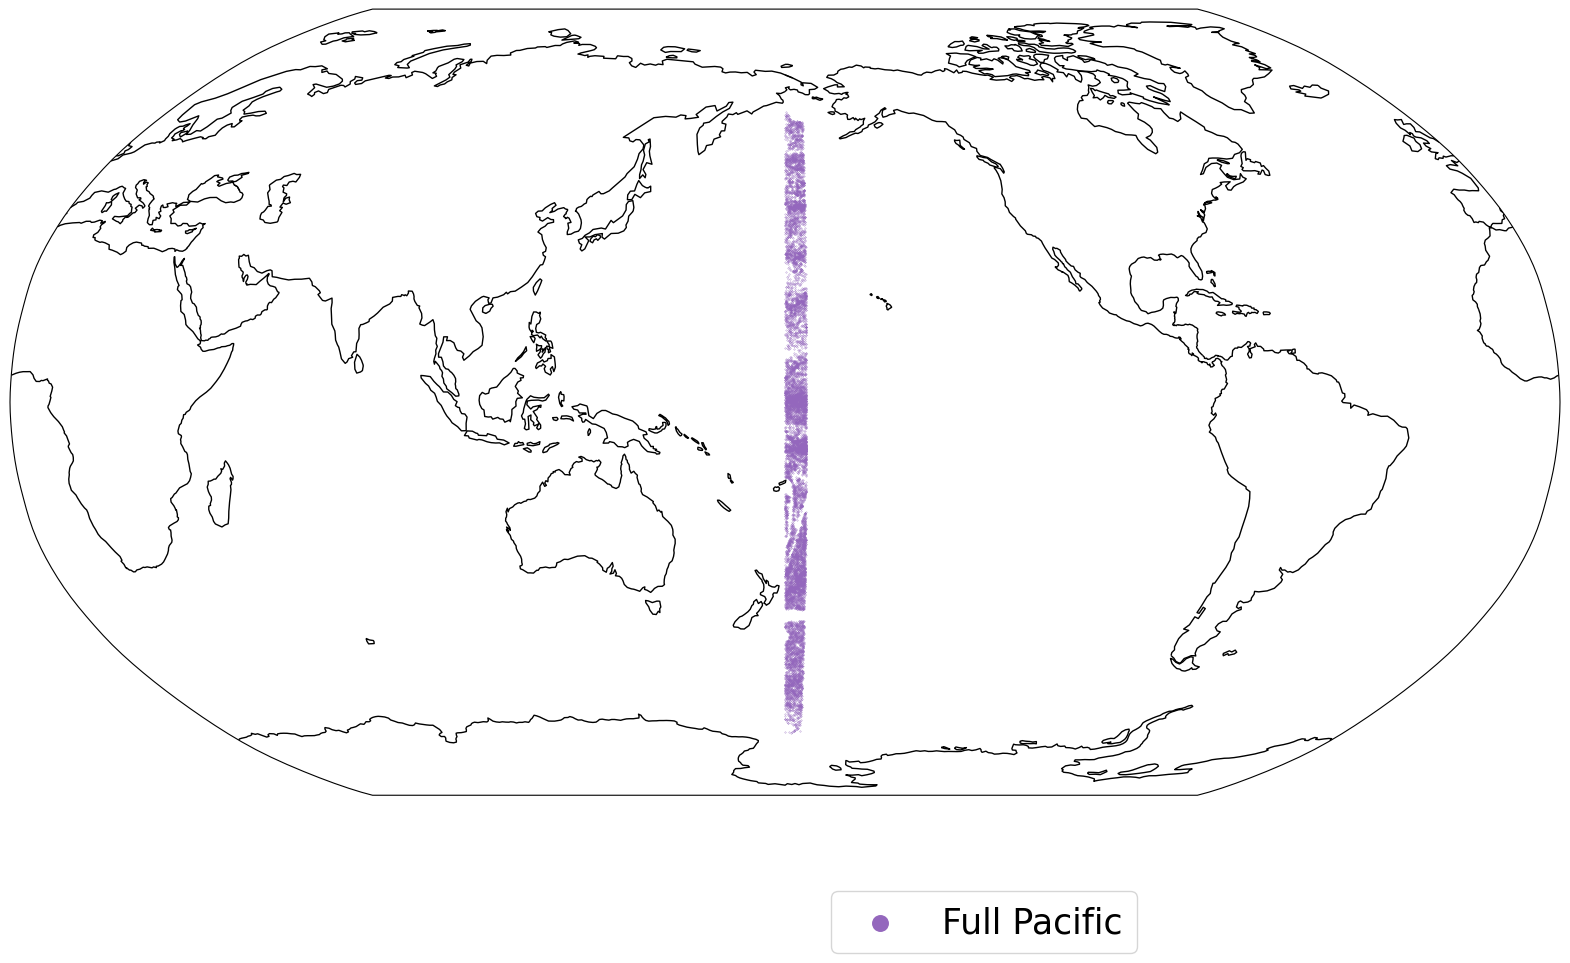

In [40]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.set_global()
#for n in range(0,len(boxes)):
#    ax.plot(posttobox(boxes[n][:2],boxes[n][2:])[0],postobox(boxes[n][:2],boxes[n][2:][1], #color=colors[n],transform=ccrs.PlateCCarree(),lw=2)

ax.scatter(pac.LONGITUDE, pac.LATITUDE, transform=ccrs.PlateCarree(),color='tab:purple',label='Full Pacific',s=0.05)


plt.legend(bbox_to_anchor=(0.738,-0.1),markerscale=50)
plt.savefig('/home.ufs/amf2288/argo-intern/notebooks/map.png')

/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Oct_24/lib/python3.12/site-packages/xarray/core/computation.py:831: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


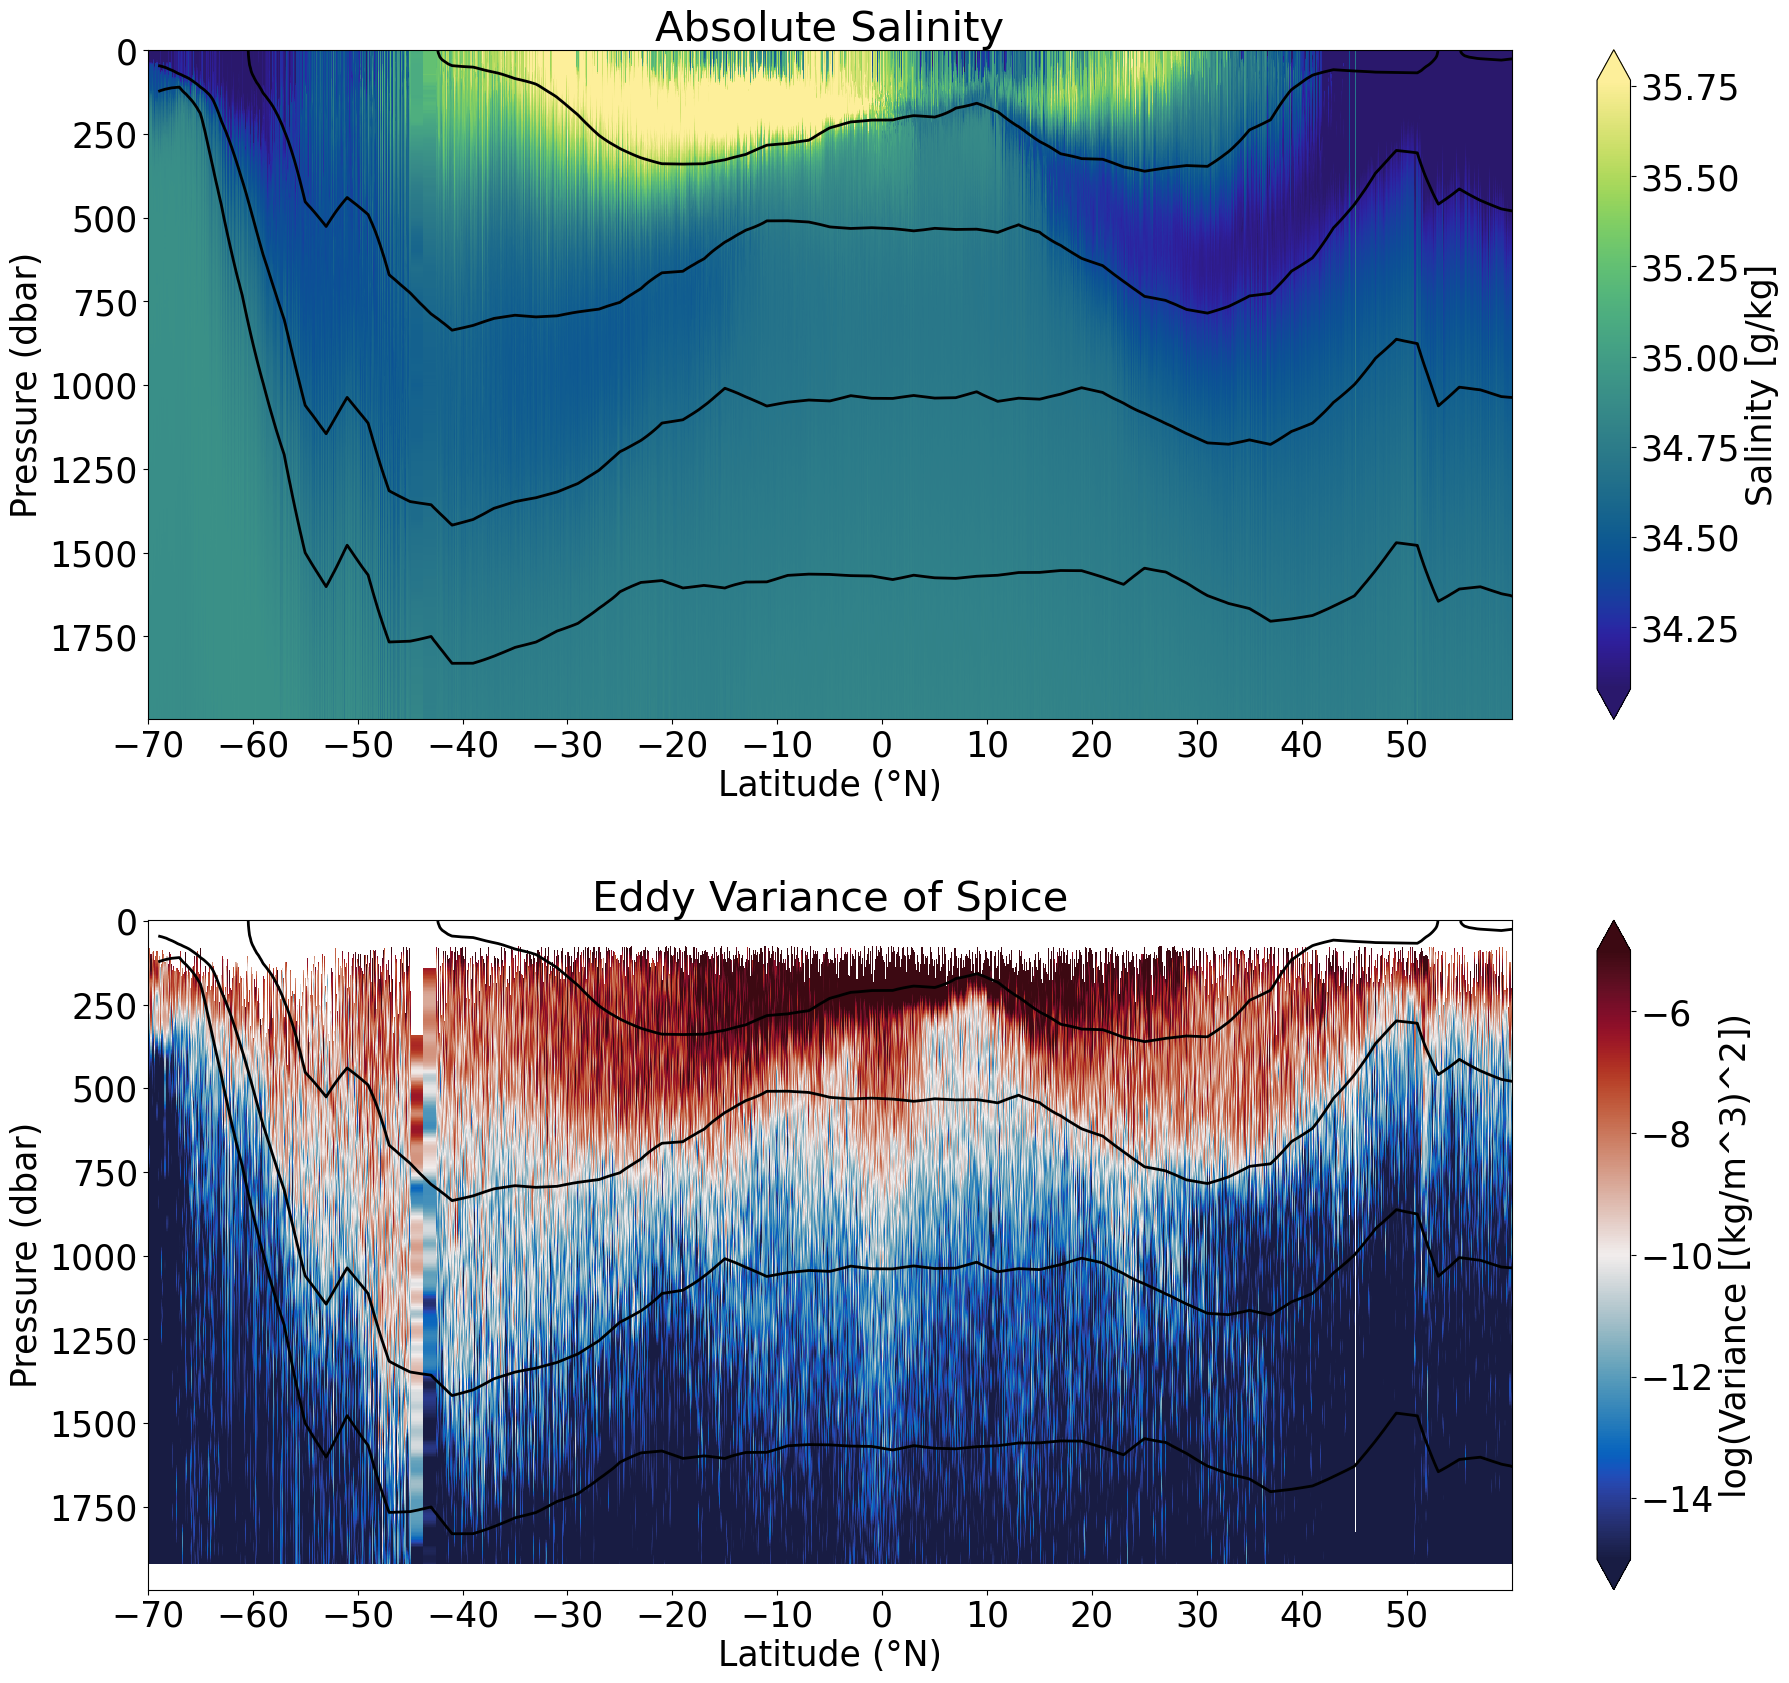

In [35]:
plt.figure(figsize=(22,20))

plt.subplot(312)
pac.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity [g/kg]'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

plt.subplot(313)
np.log(pac_SPICE_anom_binned_EKE.where(pac_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5, cbar_kwargs={'label': 'log(Variance [(kg/m^3)^2])'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Eddy Variance of Spice')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig('/home.ufs/amf2288/argo-intern/notebooks/pac.png')

/home.ufs/amf2288/mambaforge-pypy3/envs/Argo_Oct_24/lib/python3.12/site-packages/xarray/core/computation.py:831: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


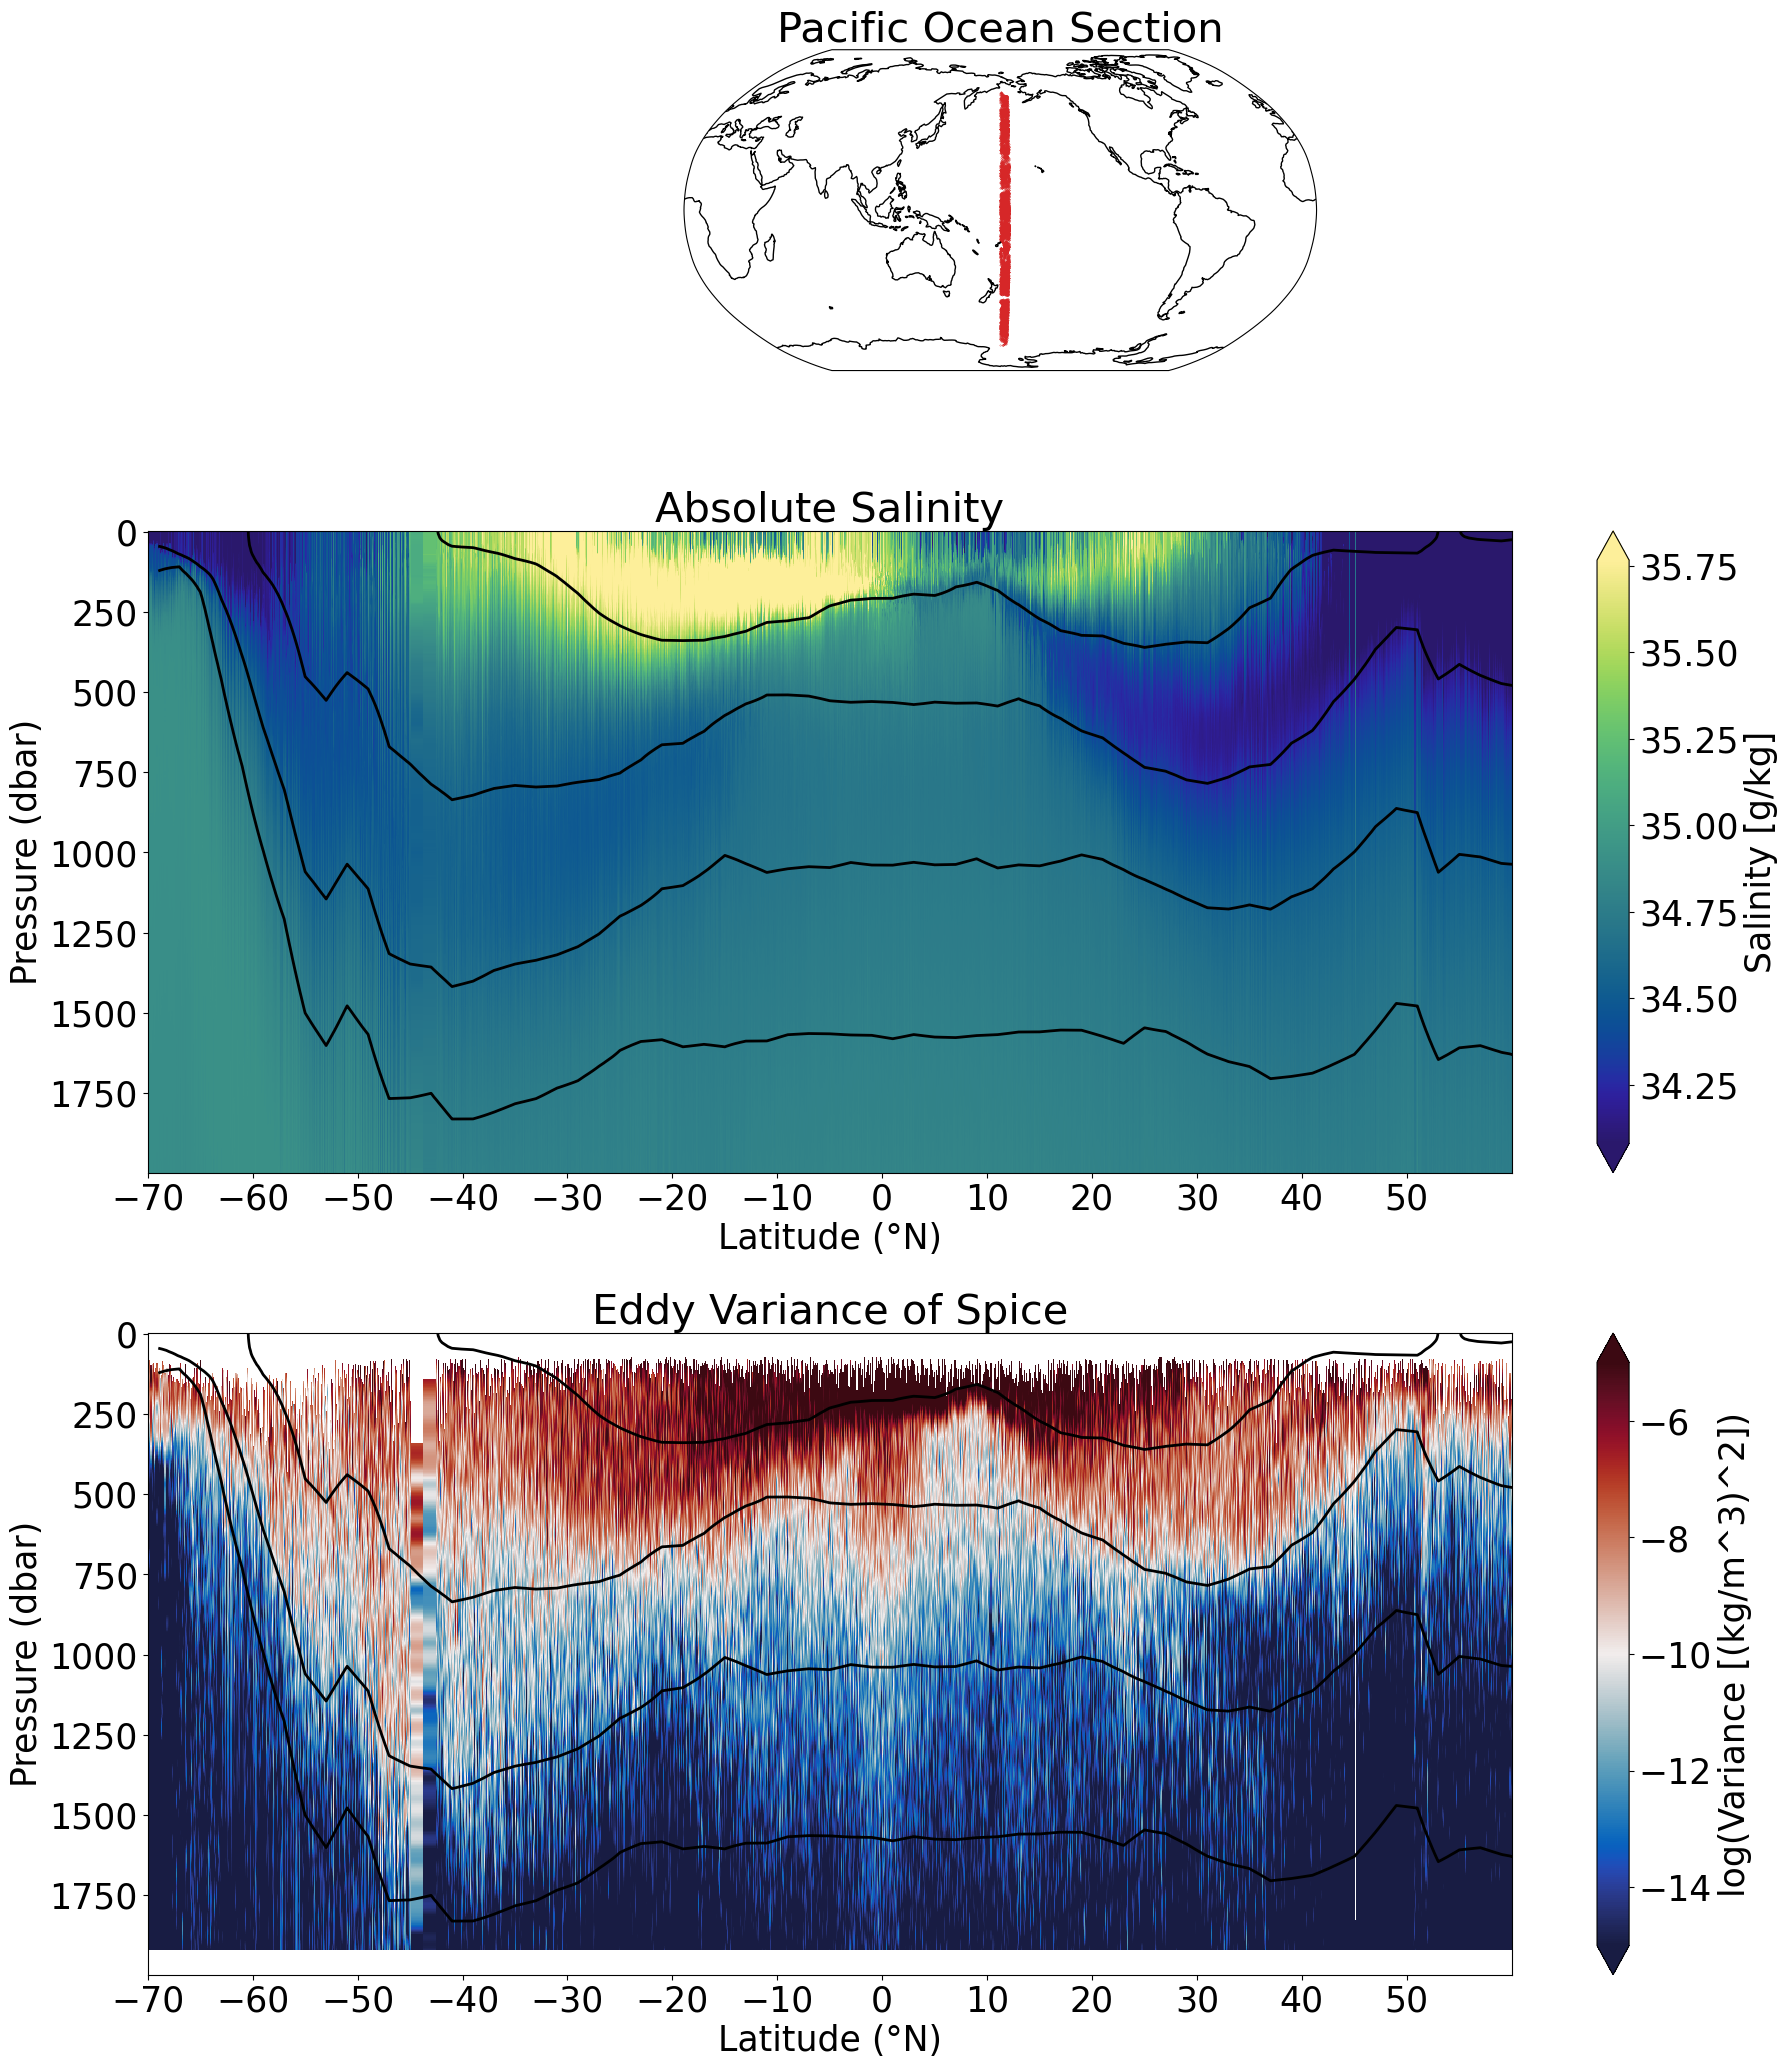

In [51]:
# Create the figure
fig = plt.figure(figsize=(22, 25))
gs = fig.add_gridspec(3, 2, height_ratios=[0.5, 1, 1])

# First subplot (BLOCK1) - centered horizontally
ax1 = fig.add_subplot(gs[0, :], projection=ccrs.Robinson(central_longitude=180))
ax1.coastlines()
ax1.set_global()
ax1.scatter(pac.LONGITUDE, pac.LATITUDE, transform=ccrs.PlateCarree(), color='tab:red', label='Full Pacific', s=0.05)
ax1.set_title('Pacific Ocean Section')

# Second subplot (BLOCK2)
ax2 = fig.add_subplot(gs[1, :])
pac.SA.sortby(x).plot(ax=ax2, x=x, y='PRES_INTERPOLATED', robust=True, cmap=cmo.haline, cbar_kwargs={'label': 'Salinity [g/kg]'})
SIG0_binned.plot.contour(ax=ax2, x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
ax2.invert_yaxis()
ax2.set_xlim([-70, 60])
ax2.set_xticks(np.arange(-70, 60, 10))
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Latitude (°N)')
ax2.set_title('Absolute Salinity')

# Third subplot (BLOCK2)
ax3 = fig.add_subplot(gs[2, :])
np.log(pac_SPICE_anom_binned_EKE.where(pac_SPICE_anom_binned_EKE.mask == 1)).sortby(x).plot(ax=ax3, x=x, y='PRES_INTERPOLATED', cmap=cmo.balance, vmin=-15, vmax=-5, cbar_kwargs={'label': 'log(Variance [(kg/m^3)^2])'})
SIG0_binned.plot.contour(ax=ax3, x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
ax3.invert_yaxis()
ax3.set_xlim([-70, 60])
ax3.set_xticks(np.arange(-70, 60, 10))
ax3.set_ylabel('Pressure (dbar)')
ax3.set_xlabel('Latitude (°N)')
ax3.set_title('Eddy Variance of Spice')

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plot
#plt.show()

plt.savefig('/home.ufs/amf2288/argo-intern/notebooks/pac.png')